This notebook looks at butyrate producers from Anni's annotation results.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
d = 'goyal2018'
fgoyal = '../../data/raw/Results_to_Claire/{}/Bayers_model/{}.dna-sequences.fasta.filter.align.16S.nwk.infertraits.abu'.format(d, d)
fgoyalmeta = '../../data/clean/{}.metadata.txt'.format(d)

d = 'kump2018'
fkump = '../../data/raw/Results_to_Claire/{}/Bayers_model/{}.dna-sequences.fasta.filter.align.16S.nwk.infertraits.abu'.format(d, d)
fkumpmeta = '../../data/clean/{}.metadata.txt'.format(d)

d = 'jacob2017'
fjacob = '../../data/raw/Results_to_Claire/{}/Bayers_model/{}.dna-sequences.fasta.filter.align.16S.nwk.infertraits.abu'.format(d, d)
fjacobmeta = '../../data/clean/{}.metadata.txt'.format(d)

df_goyal = pd.read_csv(fgoyal, sep='\t', index_col=0)
meta_goyal = pd.read_csv(fgoyalmeta, sep='\t')

df_kump = pd.read_csv(fkump, sep='\t', index_col=0)
meta_kump = pd.read_csv(fkumpmeta, sep='\t')

df_jacob = pd.read_csv(fjacob, sep='\t', index_col=0)
meta_jacob = pd.read_csv(fjacobmeta, sep='\t')

In [30]:
meta_kump.head()

,#SampleID,Forward_read,Reverse_read,Matter,Identity,PatientID,DonorID,Response,Sampletype,prepost,Sampling_day
0,34,34_S35_L001_R1_001.fastq,34_S35_L001_R2_001.fastq,Stool Patient,PD_S-10,PD,DB,NR,Patientstool,preABX,d-10
1,35,35_S36_L001_R1_001.fastq,35_S36_L001_R2_001.fastq,Stool Patient,PD_S1,PD,DB,NR,Patientstool,postABX,d1
2,36,36_S37_L001_R1_001.fastq,36_S37_L001_R2_001.fastq,Stool Patient,PD_S14,PD,DB,NR,Patientstool,postFMT,d14
3,37,37_S38_L001_R1_001.fastq,37_S38_L001_R2_001.fastq,Stool Patient,PD_S28,PD,DB,NR,Patientstool,postFMT,d28
4,38,38_S39_L001_R1_001.fastq,38_S39_L001_R2_001.fastq,Stool Patient,PD_S42,PD,DB,NR,Patientstool,postFMT,d42


These OTU tables now have the abundance of butyrate producers in the last row. Easy peasy!

Let's tidy them up a bit...

In [37]:
# Goyal 2018
tidy_goyal = meta_goyal.join(df_goyal.loc['Traits'], on='sample_alias')

# Kump 2018
meta_kump['#SampleID'] = meta_kump['#SampleID'].astype(str)
tidy_kump = meta_kump.join(df_kump.loc['Traits'], on='#SampleID')

# Jacob 2017
tidy_jacob = meta_jacob.join(df_jacob.loc['Traits'], on='run_accession')

In [43]:
# Need to get the average for all Kump donors
data_kump = (
    tidy_kump
        .query('Sampletype == "Donorstool"')
        .groupby(['DonorID', 'Response', 'PatientID'])
        .mean()
        ['Traits']
    ).reset_index()

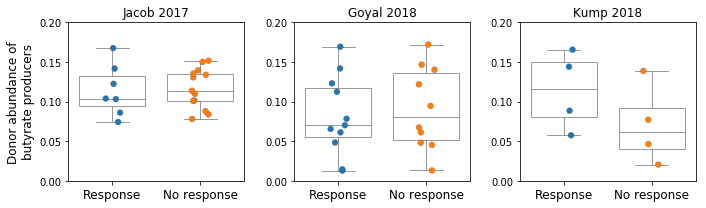

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

boxprops = {'edgecolor': 'gray', 'facecolor': 'w', 'linewidth': 0.8}
lineprops = {'color': 'gray', 'linewidth': 0.8}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops,
                       'width': 0.75})

# Jacob 2017
a = ax[0]
data = tidy_jacob.query('donor_patient == "donor"')
sns.stripplot(data=data, x='response_w4', y='Traits',
              ax=a, order=['Yes', 'No'],
              size=6, linewidth=0.2)
sns.boxplot(data=data, x='response_w4', y='Traits',
            ax=a, order=['Yes', 'No'],
            fliersize=0, **boxplot_kwargs)
a.set_title('Jacob 2017', fontsize='large')
a.set_xlabel('')
a.set_ylabel('Donor abundance of\nbutyrate producers', fontsize='large')
a.set_xticklabels(['Response', 'No response'], fontsize='large')
a.set_ylim([0, 0.2])

# Goyal 2018
a = ax[1]
data = tidy_goyal.query('time_point == "donor"')
sns.stripplot(data=data, x='response_m6', y='Traits',
              ax=a, order=[True, False],
              size=6, linewidth=0.2)
sns.boxplot(data=data, x='response_m6', y='Traits',
            ax=a, order=[True, False],
            fliersize=0,
            **boxplot_kwargs)
a.set_title('Goyal 2018', fontsize='large')
a.set_xlabel('')
a.set_ylabel('')
a.set_xticklabels(['Response', 'No response'], fontsize='large')
a.set_ylim([0, 0.2])

# Kump 2018
a = ax[2]
data = data_kump
sns.stripplot(data=data, x='Response', y='Traits',
              ax=a, order=['RE', 'NR'],
              size=6, linewidth=0.2)
sns.boxplot(data=data, x='Response', y='Traits',
            ax=a, order=['RE', 'NR'],
            fliersize=0,
            **boxplot_kwargs)
a.set_title('Kump 2018', fontsize='large')
a.set_xlabel('')
a.set_ylabel('')
a.set_xticklabels(['Response', 'No response'], fontsize='large')
a.set_ylim([0, 0.2])

fig.tight_layout()

fig.savefig('../../figures/analysis/fig2.butyrate_producers_ibd.annis_method.png')

In [40]:
data

,#SampleID,Forward_read,Reverse_read,Matter,Identity,PatientID,DonorID,Response,Sampletype,prepost,Sampling_day,Traits
